In [1]:
import pandas as pd

df1 = pd.read_table("testing.csv", sep = ',')
df2 = pd.read_table("training.csv", sep = ',')

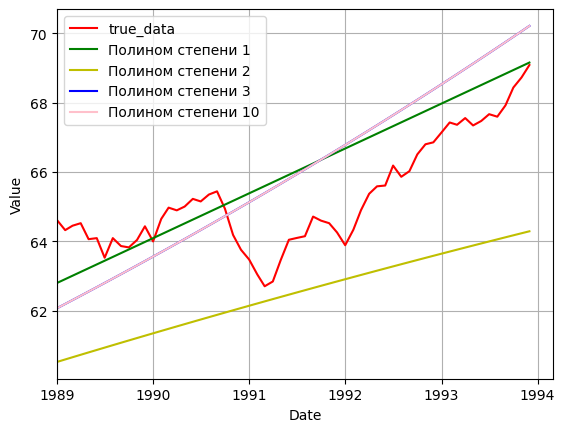

In [36]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from datetime import date



figure, axis = plt.subplots(1, 2) 

# Данные, которые будут отложены по оси Y
y1 = df1['Value'].values

# Преобразуем даты в числовой формат
x1 = df1['Date'].values
x1_float = matplotlib.dates.date2num(x1)

# Вызовем subplot явно, чтобы получить экземпляр класса AxesSubplot,
# из которого будем иметь доступ к осям
axes = plt.subplot(1, 1, 1)

#Подкорректируем оси
axes.xaxis.set_major_formatter(matplotlib.dates.DateFormatter("%Y"))
axes.set_xlabel('Date')
axes.set_ylabel('Value')

# Отобразим данные
plt.plot_date(x1_float, y1, fmt="r-", label = 'true_data')

# Изменим левую границу
plt.xlim(xmin=matplotlib.dates.date2num(date(1989, 1, 1)))
plt.grid()



#Отобразим значения в виде полинома первой степени
y2 = df2['Value'].values

x2 = df2['Date'].values
x2_float = matplotlib.dates.date2num(x2)

plm = np.polyfit(x2_float, y2, 1)#Находим коэфициента полинома

x_plm_deg_1 = np.linspace(6940, 8735, 60)#значения 6940 и 8735 появились во время перевода данных из типа date в тип float
y_plm_deg_1 = x_plm_deg_1*plm[0] + plm[1]

plt.plot(x_plm_deg_1, y_plm_deg_1, color = 'g', label = 'Полином степени 1')



#Отобразим значения в виде полинома второй степени
plm = np.polyfit(x2_float, y2, 2)#Находим коэфициента полинома

x_plm_deg_2 = np.linspace(6940, 8735, 60)
y_plm_deg_2 = (x_plm_deg_2**2)*plm[0] + x_plm_deg_2*plm[1] + plm[2]

plt.plot(x_plm_deg_2, y_plm_deg_2, color = 'y', label = 'Полином степени 2')



#Отобразим значения в виде полинома третьей степени
plm = np.polyfit(x2_float, y2, 3)#Находим коэфициента полинома

x_plm_deg_3 = np.linspace(6940, 8735, 60)
y_plm_deg_3 = (x_plm_deg_3**3)*plm[0] + (x_plm_deg_3**2)*plm[1] + x_plm_deg_3*plm[2] + plm[3]

plt.plot(x_plm_deg_3, y_plm_deg_3, color = 'b', label = 'Полином степени 3')

plt.legend()

plt.show()

In [37]:
#Проверка качества полиномиальных предсказаний
from sklearn.metrics import r2_score

#Функция 'r2_score' получает на вход 2 массива: массив настоящих значений и предсказанных - и на выходе дайт оценку, максимальное значение которой '1'. По ней мы узнаем качество наших предсказаний
print("Качество предсказаний полинома со степенью 1:" ,r2_score(y1, y_plm_deg_1))
print("Качество предсказаний полинома со степенью 2:" ,r2_score(y1, y_plm_deg_2))
print("Качество предсказаний полинома со степенью 3:" ,r2_score(y1, y_plm_deg_3))

Качество предсказаний полинома со степенью 1: 0.19684126459356854
Качество предсказаний полинома со степенью 2: -2.624349911650436
Качество предсказаний полинома со степенью 3: -0.14431149238499774
Качество предсказаний полинома со степенью 10: -5294.744597695193


In [ ]:
#Как мы видим самое лучшее качество у полинома первой степени и самое худшее у полинома второй степени, причём и третий и второй полиномы
#имеют сильно плохое качество оценки, в то время как первый очень немного от них оторвался, но он имеет хотя бы положительную оценку.
#В общем, качество полиномиальной регрессии достаточно посредственно и имеет маленькие оценки.